In [15]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [16]:
from tensorflow.python.keras.applications import MobileNet

conv_base=MobileNet(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 101, 101, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 50, 50, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 50, 50, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 50, 50, 32)        128       
__________

In [18]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

filepath="MobileNet_Indus_Fruits_7_classes_100_100_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 3, 3, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                294944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 3,524,039
Trainable params: 3,502,151
Non-trainable params: 21,888
_________________________________________________________________


In [19]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [20]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [21]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
175/175 [==============================] - 46s 261ms/step - loss: 1.5113 - categorical_accuracy: 0.4932 - val_loss: 0.7742 - val_categorical_accuracy: 0.7536
Epoch 2/200
175/175 [==============================] - 13s 74ms/step - loss: 0.9624 - categorical_accuracy: 0.6954 - val_loss: 0.5626 - val_categorical_accuracy: 0.8464
Epoch 3/200
175/175 [==============================] - 13s 74ms/step - loss: 0.7469 - categorical_accuracy: 0.7729 - val_loss: 0.4651 - val_categorical_accuracy: 0.8607
Epoch 4/200
175/175 [==============================] - 13s 74ms/step - loss: 0.6123 - categorical_accuracy: 0.8271 - val_loss: 0.4574 - val_categorical_accuracy: 0.8500
Epoch 5/200
175/175 [==============================] - 12s 69ms/step - loss: 0.5683 - categorical_accuracy: 0.8396 - val_loss: 0.4772 - val_categorical_accuracy: 0.8607
Epoch 6/200
175/175 [==============================] - 13s 76ms/step - loss: 0.5341 - categorical_accuracy

Epoch 30/200
175/175 [==============================] - 12s 71ms/step - loss: 0.2382 - categorical_accuracy: 0.9518 - val_loss: 0.2444 - val_categorical_accuracy: 0.9464
Epoch 31/200
175/175 [==============================] - 12s 70ms/step - loss: 0.2475 - categorical_accuracy: 0.9439 - val_loss: 0.3658 - val_categorical_accuracy: 0.9250
Epoch 32/200
175/175 [==============================] - 12s 70ms/step - loss: 0.2096 - categorical_accuracy: 0.9525 - val_loss: 0.3604 - val_categorical_accuracy: 0.9143
Epoch 33/200
175/175 [==============================] - 12s 70ms/step - loss: 0.2172 - categorical_accuracy: 0.9550 - val_loss: 0.3581 - val_categorical_accuracy: 0.9179
Epoch 34/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1934 - categorical_accuracy: 0.9571 - val_loss: 0.3977 - val_categorical_accuracy: 0.9357
Epoch 35/200
175/175 [==============================] - 12s 71ms/step - loss: 0.1947 - categorical_accuracy: 0.9525 - val_loss: 0.3372 - val_categoric

Epoch 60/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1315 - categorical_accuracy: 0.9750 - val_loss: 0.2324 - val_categorical_accuracy: 0.9536
Epoch 61/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1340 - categorical_accuracy: 0.9739 - val_loss: 0.2587 - val_categorical_accuracy: 0.9321
Epoch 62/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1366 - categorical_accuracy: 0.9729 - val_loss: 0.2547 - val_categorical_accuracy: 0.9536
Epoch 63/200
175/175 [==============================] - 13s 74ms/step - loss: 0.1712 - categorical_accuracy: 0.9664 - val_loss: 0.2193 - val_categorical_accuracy: 0.9500
Epoch 64/200
175/175 [==============================] - 13s 75ms/step - loss: 0.1443 - categorical_accuracy: 0.9711 - val_loss: 0.1962 - val_categorical_accuracy: 0.9607
Epoch 65/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1249 - categorical_accuracy: 0.9771 - val_loss: 0.2985 - val_categoric

Epoch 90/200
175/175 [==============================] - 12s 71ms/step - loss: 0.1052 - categorical_accuracy: 0.9804 - val_loss: 0.2853 - val_categorical_accuracy: 0.9357
Epoch 91/200
175/175 [==============================] - 13s 74ms/step - loss: 0.1264 - categorical_accuracy: 0.9775 - val_loss: 0.3381 - val_categorical_accuracy: 0.9464
Epoch 92/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1048 - categorical_accuracy: 0.9807 - val_loss: 0.2871 - val_categorical_accuracy: 0.9500
Epoch 93/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1097 - categorical_accuracy: 0.9796 - val_loss: 0.2977 - val_categorical_accuracy: 0.9321
Epoch 94/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1295 - categorical_accuracy: 0.9771 - val_loss: 0.2933 - val_categorical_accuracy: 0.9357
Epoch 95/200
175/175 [==============================] - 12s 70ms/step - loss: 0.1165 - categorical_accuracy: 0.9786 - val_loss: 0.3180 - val_categoric

175/175 [==============================] - 12s 71ms/step - loss: 0.0763 - categorical_accuracy: 0.9886 - val_loss: 0.2748 - val_categorical_accuracy: 0.9536
Epoch 121/200
175/175 [==============================] - 12s 71ms/step - loss: 0.1026 - categorical_accuracy: 0.9850 - val_loss: 0.2943 - val_categorical_accuracy: 0.9536
Epoch 122/200
175/175 [==============================] - 14s 77ms/step - loss: 0.0767 - categorical_accuracy: 0.9850 - val_loss: 0.3801 - val_categorical_accuracy: 0.9357
Epoch 123/200
175/175 [==============================] - 12s 71ms/step - loss: 0.0793 - categorical_accuracy: 0.9879 - val_loss: 0.3567 - val_categorical_accuracy: 0.9464
Epoch 124/200
175/175 [==============================] - 15s 84ms/step - loss: 0.0888 - categorical_accuracy: 0.9843 - val_loss: 0.2959 - val_categorical_accuracy: 0.9429
Epoch 125/200
175/175 [==============================] - 13s 76ms/step - loss: 0.0964 - categorical_accuracy: 0.9807 - val_loss: 0.2771 - val_categorical_accur

Epoch 150/200
175/175 [==============================] - 13s 73ms/step - loss: 0.0588 - categorical_accuracy: 0.9886 - val_loss: 0.2762 - val_categorical_accuracy: 0.9393
Epoch 151/200
175/175 [==============================] - 13s 73ms/step - loss: 0.0740 - categorical_accuracy: 0.9857 - val_loss: 0.2612 - val_categorical_accuracy: 0.9429
Epoch 152/200
175/175 [==============================] - 13s 74ms/step - loss: 0.0784 - categorical_accuracy: 0.9857 - val_loss: 0.2520 - val_categorical_accuracy: 0.9500
Epoch 153/200
175/175 [==============================] - 14s 77ms/step - loss: 0.0842 - categorical_accuracy: 0.9846 - val_loss: 0.2762 - val_categorical_accuracy: 0.9429
Epoch 154/200
175/175 [==============================] - 14s 79ms/step - loss: 0.0630 - categorical_accuracy: 0.9900 - val_loss: 0.2648 - val_categorical_accuracy: 0.9429
Epoch 155/200
175/175 [==============================] - 13s 72ms/step - loss: 0.0589 - categorical_accuracy: 0.9914 - val_loss: 0.3317 - val_cat

Epoch 180/200
175/175 [==============================] - 12s 70ms/step - loss: 0.0595 - categorical_accuracy: 0.9882 - val_loss: 0.3113 - val_categorical_accuracy: 0.9393
Epoch 181/200
175/175 [==============================] - 12s 70ms/step - loss: 0.0502 - categorical_accuracy: 0.9929 - val_loss: 0.2379 - val_categorical_accuracy: 0.9500
Epoch 182/200
175/175 [==============================] - 13s 72ms/step - loss: 0.0731 - categorical_accuracy: 0.9889 - val_loss: 0.2406 - val_categorical_accuracy: 0.9536
Epoch 183/200
175/175 [==============================] - 14s 81ms/step - loss: 0.0683 - categorical_accuracy: 0.9893 - val_loss: 0.3204 - val_categorical_accuracy: 0.9500
Epoch 184/200
175/175 [==============================] - 13s 76ms/step - loss: 0.0576 - categorical_accuracy: 0.9907 - val_loss: 0.3316 - val_categorical_accuracy: 0.9429
Epoch 185/200
175/175 [==============================] - 13s 72ms/step - loss: 0.0437 - categorical_accuracy: 0.9932 - val_loss: 0.2421 - val_cat

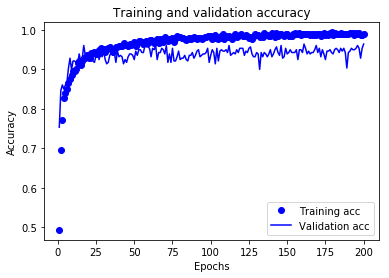

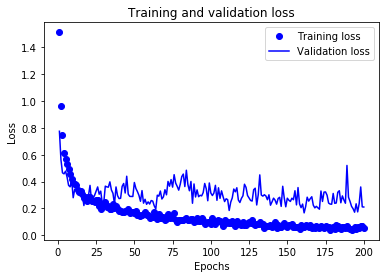

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
from tensorflow.python.keras.models import load_model

best_model = load_model('MobileNet_Indus_Fruits_7_classes_100_100_1st Experiment.h5')

In [27]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 1s 19ms/step - loss: 0.2459 - categorical_accuracy: 0.9446
Test-set accuracy: 94.46%


In [28]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [29]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 1s 1ms/sample - loss: 0.2459 - categorical_accuracy: 0.9446
Loss on test set:  0.24591173777090652
Accuracy on test set:  0.94464284


In [30]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 1s 2ms/sample
(560, 1)
(560, 1)


<Figure size 3600x2400 with 0 Axes>

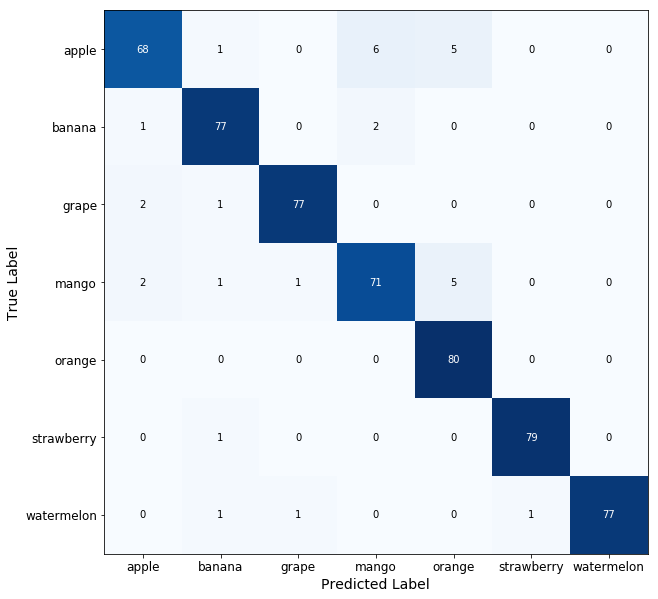

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure(dpi=600)
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.xlabel('Predicted Label',fontsize=14)
plt.ylabel('True Label',fontsize=14)
plt.savefig('MobileNet_Indus Fruits_7 classes_100_100_confusion_matrix.jpeg',dpi=1200)
plt.show()